In [1]:
import aplpy
from astroquery.sdss import SDSS
from astropy import coordinates as coords
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

C:\ProgramData\Anaconda2\lib\site-packages\astroquery\sdss\__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [2]:
pos = coords.SkyCoord('11h58m45.4s -00d27m16s', frame='icrs')
obj = SDSS.query_region(pos, spectro=True, data_release=14)
df = obj.to_pandas()
df

,ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
0,179.689293,-0.454379,1237648720693755918,756,301,2,427,0.094875,285,51663,191,320934003030910976,26,SDSS
1,179.689293,-0.454379,1237648720693755918,756,301,2,427,0.094841,285,51930,184,320932083365079040,26,SDSS


In [20]:
obj_spec = SDSS.get_spectra(pos, data_release=14)
obj_spec[0].writeto(fileobj='SDSSspec-{}{}'.format(pos.ra,pos.dec),
                    output_verify='fix', clobber=True, checksum=False)

WindowsError: [Error 32] The process cannot access the file because it is being used by another process: 'SDSSspec-179.689166667 deg-0.454444444444 deg'

In [4]:
im = SDSS.get_images(coordinates=pos)
im[0].writeto(fileobj='SDSSim-{}{}'.format(pos.ra,pos.dec),
              output_verify='fix', clobber=True, checksum=False)

In [5]:
image_data = fits.getdata('SDSSim-{}{}'.format(pos.ra,pos.dec), ext=0)

In [6]:
obj_spec_data = fits.getdata('SDSSspec-{}{}'.format(pos.ra,pos.dec), ext=0)

In [7]:
spec_data = fits.open('SDSSspec-{}{}'.format(pos.ra,pos.dec), ext=0)

In [14]:
spec_data[2].

AttributeError: 'BinTableHDU' object has no attribute 'show'

In [17]:
15.*225

3375.0

In [16]:
flux_data = Table(spec_data[2].data)
flux_data

SURVEY,INSTRUMENT,CHUNK,PROGRAMNAME,PLATERUN,PLATEQUALITY,PLATESN2,DEREDSN2,LAMBDA_EFF,BLUEFIBER,ZOFFSET,SNTURNOFF,NTURNOFF,SPECPRIMARY,SPECLEGACY,SPECSEGUE,SPECSEGUE1,SPECSEGUE2,SPECBOSS,BOSS_SPECOBJ_ID,SPECOBJID,FLUXOBJID,BESTOBJID,TARGETOBJID,PLATEID,NSPECOBS,FIRSTRELEASE,RUN2D,RUN1D,DESIGNID,CX,CY,CZ,XFOCAL,YFOCAL,SOURCETYPE,TARGETTYPE,PRIMTARGET,SECTARGET,LEGACY_TARGET1,LEGACY_TARGET2,SPECIAL_TARGET1,SPECIAL_TARGET2,SEGUE1_TARGET1,SEGUE1_TARGET2,SEGUE2_TARGET1,SEGUE2_TARGET2,MARVELS_TARGET1,MARVELS_TARGET2,BOSS_TARGET1,BOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,SPECTROGRAPHID,PLATE,TILE,MJD,FIBERID,OBJID [5],PLUG_RA,PLUG_DEC,CLASS,SUBCLASS,Z,Z_ERR,RCHI2,DOF,RCHI2DIFF,TFILE,TCOLUMN [10],NPOLY,THETA [10],VDISP,VDISP_ERR,VDISPZ,VDISPZ_ERR,VDISPCHI2,VDISPNPIX,VDISPDOF,WAVEMIN,WAVEMAX,WCOVERAGE,ZWARNING,SN_MEDIAN_ALL,SN_MEDIAN [5],CHI68P,FRACNSIGMA [10],FRACNSIGHI [10],FRACNSIGLO [10],SPECTROFLUX [5],SPECTROFLUX_IVAR [5],SPECTROSYNFLUX [5],SPECTROSYNFLUX_IVAR [5],SPECTROSKYFLUX [5],ANYANDMASK,ANYORMASK,SPEC1_G,SPEC1_R,SPEC1_I,SPEC2_G,SPEC2_R,SPEC2_I,ELODIE_FILENAME,ELODIE_OBJECT,ELODIE_SPTYPE,ELODIE_BV,ELODIE_TEFF,ELODIE_LOGG,ELODIE_FEH,ELODIE_Z,ELODIE_Z_ERR,ELODIE_Z_MODELERR,ELODIE_RCHI2,ELODIE_DOF,Z_NOQSO,Z_ERR_NOQSO,ZWARNING_NOQSO,CLASS_NOQSO,SUBCLASS_NOQSO,RCHI2DIFF_NOQSO,Z_PERSON,CLASS_PERSON,Z_CONF_PERSON,COMMENTS_PERSON,CALIBFLUX [5],CALIBFLUX_IVAR [5]
str6,str4,str16,str23,str16,str8,float32,float32,float32,int32,float32,float32,int32,uint8,uint8,uint8,uint8,uint8,uint8,int32,str22,str19,str19,str22,str19,int16,str3,str3,str1,int32,float64,float64,float64,float32,float32,str19,str8,int32,int32,int32,int32,int64,int64,int32,int32,int32,int32,int32,int32,int64,int64,int64,int64,int16,int32,int32,int32,int32,int32,float64,float64,str6,str21,float32,float32,float32,int32,float32,str24,int32,int32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32,str25,str21,str10,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,int32,str1,str1,float32,float32,int32,int32,str1,float32,float32
sdss,SDSS,chunk4,legacy,chunk4,bad,6.28388,0.0,5000.0,-1,0.0,-9999.0,-1,0,0,0,0,0,0,0,320934003030910976,1237648720693755918,1237648720693755918,284723073712301,320881501350684672,2,dr7,26,,-1,-0.999953851644,0.00542288994752,-0.00793012280291,27.9585,-95.4915,GALAXY,SCIENCE,64,0,64,0,0,0,0,0,0,0,0,0,0,0,0,0,1,285,103,51663,191,756 .. 173,179.68928,-0.45436733,GALAXY,,0.094875,1.97337e-05,1.05042,3614,0.446419,spEigenGal-53724.fits,0 .. -1,3,0.00206913 .. 0.0,96.6767,14.002,0.0,0.0,1821.89,2168.0,2117,3797.52,9187.56,0.3621,0,10.5844,1.26429 .. 8.20635,0.997621,0.319525 .. 0.0,0.159624 .. 0.0,0.159901 .. 0.0,9.66177 .. 95.2805,0.61557 .. 0.242639,9.86095 .. 93.783,1.0655 .. 0.283828,15.1065 .. 172.423,226557952,266272768,9.01793,9.41894,6.28388,9.67293,13.7711,6.88659,,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,,,0.0,0.0,0,0,,6.27212 .. 103.604,5.42143 .. 0.316892


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
C:\ProgramData\Anaconda2\lib\site-packages\aplpy\wcs_util.py:515: UserWarning: Pixels are not square, using an average pixel scale
  warnings.warn("Pixels are not square, using an average pixel scale")


INFO: Auto-setting vmax to  2.237e-01 [aplpy.core]


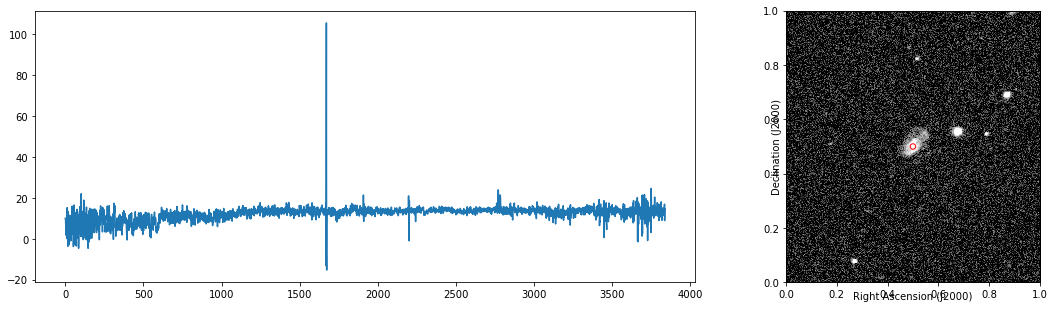

In [8]:
height_ratios = [5]
width_ratios = [13,5]
wspace = 0
hspace = 0
fig = plt.figure(figsize=(sum(width_ratios) + wspace *
                          (len(width_ratios) - 1),
                          sum(height_ratios) + hspace *
                          (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios),
                       len(width_ratios),
                       height_ratios=height_ratios,
                       width_ratios=width_ratios)
fig.suptitle('', fontsize=20)

ax = fig.add_subplot(gs[0,0])
ax.plot(obj_spec_data)
# ax.axvline(6564.61)

ax = fig.add_subplot(gs[0,1])
ax = aplpy.FITSFigure('SDSSim-{}{}'.format(pos.ra,pos.dec), figure=fig,
                       subplot=list(gs[0,1].get_position(fig).bounds))
ax.recenter(pos.ra,pos.dec,radius=.02)
ax.axis_labels.set_xtext('Right Ascension (J2000)')
ax.axis_labels.set_ytext('Declination (J2000)')
ax.show_grayscale(stretch='log',
                  vmin=np.percentile(image_data,50),
                  vmid=np.percentile(image_data,25))
ax.show_markers(pos.ra,pos.dec)

plt.show()